# Lecture 2.3 matplotlib 入門

- マットプロットリブ
- 単純方式
  - `plt.xxx`
- ax変数利用方式
  - `ax.xxx`
  - 単純方式で対応できない場合
  - ax変数を使わないと実現できない細かい表示をする場合
  - 複数のグラフ領域を同時に使う場合
- データフレーム利用方式
  - データフレームの関数からmatplotlibを呼び出せる

In [24]:
# データフレーム表示用関数
from IPython.display import display

# 余分なワーニングを非表示にする
import warnings
warnings.filterwarnings('ignore')

# 必要ライブラリ
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# matplotlibの日本語化対応
import japanize_matplotlib

# グラフのデフォルトフォント指定
plt.style.use('seaborn')
plt.rcParams["font.size"] = 14
plt.rcParams["font.family"] = 'IPAexGothic'

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


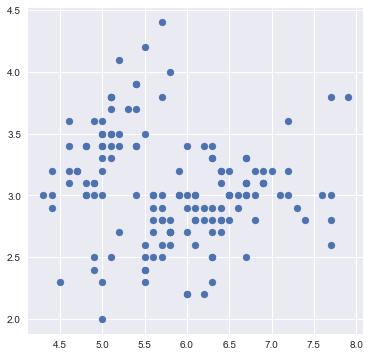

In [6]:
# 単純方式

# データ準備
import seaborn as sns
df_iris = sns.load_dataset("iris")

# 結果確認
display(df_iris.head())

# 散布図 x座標用Series
xs = df_iris['sepal_length']

# 散布図 y座標用Series
ys = df_iris['sepal_width']

# サイズ設定
plt.rcParams['figure.figsize'] = (6, 6)

# 散布図
plt.scatter(xs, ys)

# 描画
plt.show()

In [9]:
# 関数グラフ表示（plot関数）の単純ケース

# シグモイド関数の定義
def sigmoid(x, a):
    return 1 / (1 + np.exp(-a * x))

# グラフ描画用 x座標リスト
xp = np.linspace(-3, 3, 61)

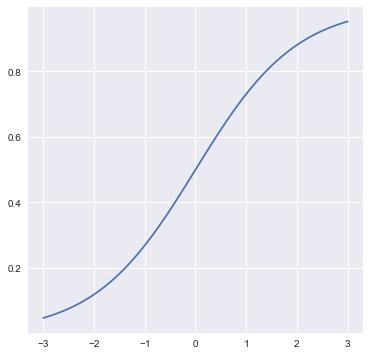

In [10]:
# サイズ設定
plt.rcParams['figure.figsize'] = (6, 6)

# グラフの描画
plt.plot(xp, sigmoid(xp, 1.0))

# 描画
plt.show()

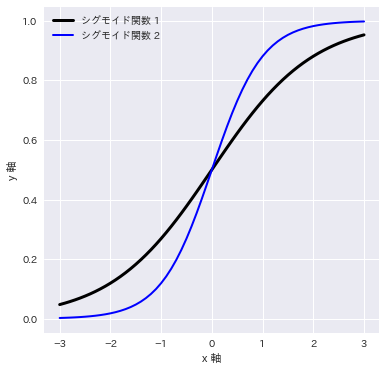

In [17]:
# 関数グラフ表示（plot関数）の複雑ケース

# サイズ設定
plt.rcParams['figure.figsize'] = (6, 6)

# ラベル付きグラフ描画 #1
plt.plot(xp, sigmoid(xp, 1.0), label='シグモイド関数 1', lw=3, c='k')

# ラベル付きグラフ描画 #2
plt.plot(xp, sigmoid(xp, 2.0), label='シグモイド関数 2', lw=2, c='b')

# 方眼表示
plt.grid(True)

# 凡例表示
plt.legend()

# 軸表示
plt.xlabel('x 軸')
plt.ylabel('y 軸')

# 描画
plt.show()

In [ ]:
# ax変数の利用1（細かい描画の設定）

# ax変数を用いた時系列のグラフ表示

In [18]:
# データの準備
# アイスクリーム消費量
df_ice = pd.read_excel('https://github.com/makaishi2\
/sample-data/blob/master/data/ice-sales.xlsx?raw=true', sheet_name=0)

# 結果確認
display(df_ice.head())

,年月,支出
0,2015-01-01,401
1,2015-02-01,345
2,2015-03-01,480
3,2015-04-01,590
4,2015-05-01,928


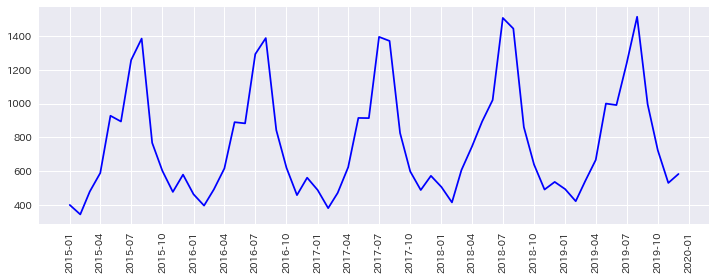

In [19]:
# ax変数の取得
# サイズ指定も同時に行う
fig, ax = plt.subplots(figsize=(12, 4))

# グラフ描画
ax.plot(df_ice['年月'], df_ice['支出'], c='b')

# 日付設定用ライブラリ
import matplotlib.dates as mdates

# 3ヶ月区切りの目盛りにする
days = mdates.MonthLocator(bymonth=range(1, 13, 3))
ax.xaxis.set_major_locator(days)

# x 軸ラベルを90度回転
ax.tick_params(axis='x', rotation=90)

# 方眼表示
ax.grid(True)

# 描画
plt.show()

In [ ]:
# ax変数の利用2（複数グラフ領域）

# 複数グラフ領域への描画

In [21]:
# データ準備

# 手書き数字データ
# 取得に時間がかかる
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1,)

# イメージデータ
image = mnist.data
# 正解データ
label = mnist.target

KeyError: 0

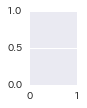

In [25]:
# サイズ設定
plt.figure(figsize=(10, 3))

# 20個のイメージを表示
for i in range(20):
    # i番目のax変数取得
    ax = plt.subplot(2, 10, i+1)

    # i番目のイメージデータ取得し28*28に変換
    img = image[i].reshape(28, 28)

    # imgをイメージ表示
    ax.imshow(img, cmap='gray_r')

    # 正解データをタイトル表示
    ax.set_title(label[i])
    
    # x, y目盛り非表示
    ax.set_xticks([])
    ax.set_yticks([])

# 隣接オブジェクトとぶつからないようにする
plt.tight_layout()

# 表示
plt.show()

In [ ]:
# データフレーム利用方式

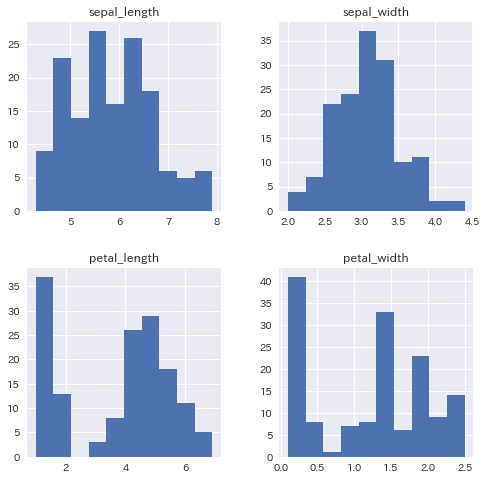

In [27]:
# ヒストグラム表示

# サイズ設定
plt.rcParams['figure.figsize'] = (8, 8)

# ヒストグラム
df_iris.hist()

# 表示
plt.show()

In [ ]:
# Seriesを使った棒グラフの表示

In [28]:
# データ準備

# df_iris['sepal_width']の値別個数を集計し、上位5件を取得
counts_ser = df_iris['sepal_width'].value_counts().iloc[:5]

# 結果確認
print(counts_ser)

3.0    26
2.8    14
3.2    13
3.4    12
3.1    11
Name: sepal_width, dtype: int64


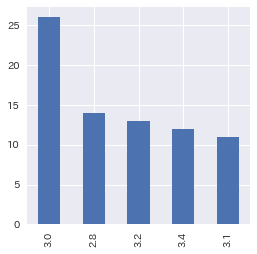

In [29]:
# value_countsの結果を棒グラフ表示

# サイズ設定
plt.rcParams['figure.figsize'] = (4, 4)

# Seriesデータで棒グラフ表示
counts_ser.plot(kind='bar')

# 表示
plt.show()